# Model Creation [Multinomial Naive Bayes, SVM, RNN]

In [1]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import pickle

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

c:\Users\yousu\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\yousu\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\yousu\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Example of the Dataset, there are 21 languages with millions of words within each language.
### Below is an example of a txt file from the scandinavian language set

In [15]:
directory = '/Users/ayush/Desktop/NLP_Proj/txt'
print("Languages avaliable: " + str(len(os.listdir(directory)) - 1))
print(os.listdir(directory))

Languages avaliable: 21
['sl', 'sk', 'pl', 'sv', '.DS_Store', 'da', 'el', 'lv', 'it', 'cs', 'ro', 'pt', 'hu', 'nl', 'bg', 'de', 'fi', 'fr', 'es', 'et', 'en', 'lt']


In [16]:
# Path to the txt file
file = '/Users/ayush/Desktop/NLP_Proj/txt/sk/ep-09-03-11-005-14.txt'

# Opening and reading the data
with open(file) as f:
    lines = f.readlines()
print(lines)

['<CHAPTER ID="005-14">\n', '14. Prístup verejnosti k dokumentom Európskeho parlamentu, Rady a Komisie (prepracované znenie) (\n', '<P>\n', '- Pred konečným hlasovaním:\n', '<SPEAKER ID="124" NAME="Michael Cashman">\n', 'spravodajca. - Vážená pani predsedajúca, v súlade s článkom 53 by som chcel požiadať Komisiu o reakciu a aby nám povedala, či zamýšľa prijať všetky pozmeňujúce a doplňujúce návrhy tak, ako boli dnes prijaté.\n', '<SPEAKER ID="125" NAME="Günter Verheugen">\n', 'podpredseda Komisie. - Vážená pani predsedajúca, je mi cťou predniesť nasledujúce vyhlásenie v mene Komisie.\n', '<P>\n', 'Komisia vezme do úvahy pozmeňujúce a doplňujúce návrhy odhlasované Parlamentom, ktoré podrobne posúdi. Komisia potvrdzuje ochotu hľadať kompromis s Parlamentom a Radou. Komisia zváži svoj návrh až po tom, ako obidva útvary rozpočtového orgánu prijmú svoje pozície. Komisia medzitým zamýšľa pokračovať vo vedení konštruktívneho dialógu s obidvoma inštitúciami.\n', '<SPEAKER ID="126" NAME="Michae

### As we can see the data has a lot of issues, with punctuation not required and a lot of "<" and ">"

#### Thus we process the data below, for all files in every directory. Here we are only creating a test set of 200 files from each language. We have added the complete dataset created in the file as well.

In [17]:
# Tokenize text, remove lines with XML-Tags "<", and strip empty lines and their correspondances
txtFolder = 'C:\\CS6120 NLP\\Homework\\Final Project\\Models\\txt'
trainingData = {}
dataset = []                   
for folder in list(os.listdir(txtFolder)):
    try:
        for file in list(os.listdir(txtFolder + '\\' + folder))[:200]:
            try:
                data = np.loadtxt(txtFolder + '\\' + folder + '\\' + file, dtype="str",comments="<", delimiter="\n", unpack=False, encoding='utf8')
                if data.size > 1:
                    data = ' '.join(data.tolist())
                trainingData = {'langauage': folder, 'text': data}
                dataset.append(trainingData)
            except:
                print('File failed: ' + file)
    except:
        print('Folder failed:' + folder)

In [18]:
# Saving the file into a csv to make it easier to use it
df.to_csv('testDataSet_train.csv')

In [19]:
# Pulling the test data out of the csv
test_df = pd.read_csv('testDataSet_train.csv', index_col=False)
test_df = test_df.drop(['Unnamed: 0'], axis=1)
test_df

,langauage,text
0,bg,Състав на Парламента: вж. протоколи
1,bg,Одобряване на протокола от предишното заседани...
2,bg,Състав на Парламента: вж. протоколи
3,bg,Проверка на пълномощията: вж. протоколи
4,bg,Внасяне на документи: вж. протоколи
...,...,...
4195,sv,['Afghanistan - ett år efter Bonn-överenskomme...
4196,sv,['Verksamheten vid Europeiska banken för återu...
4197,sv,['Återupptagande av sessionen'\n 'Jag förklara...
4198,sv,['Svälten i världen och undanröjande av hinder...


Ensure that the `testDataSet_full.csv` is in the same folder as this notebook so that pandas can load the data into a dataframe

In [3]:
# Complete dataset 
full_df = pd.read_csv('testDataSet_full.csv', index_col=False)
full_df = full_df.drop(['Unnamed: 0'], axis=1)
full_df

,langauage,text
0,bg,Състав на Парламента: вж. протоколи
1,bg,Одобряване на протокола от предишното заседани...
2,bg,Състав на Парламента: вж. протоколи
3,bg,Проверка на пълномощията: вж. протоколи
4,bg,Внасяне на документи: вж. протоколи
...,...,...
187066,sv,Återupptagande av sessionen Jag förklarar Euro...
187067,sv,Återupptagande av sammanträdet Av tekniska skä...
187068,sv,Meddelande från talmannen Jag kan meddela att ...
187069,sv,Justering av protokollet från föregående samma...


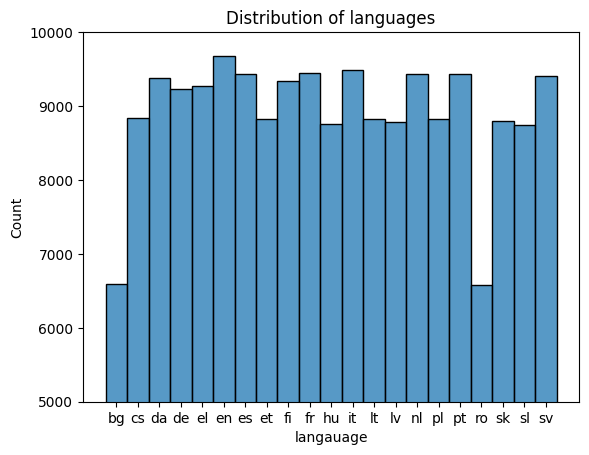

In [4]:
# Histogram Visualization of the count 
sns.histplot(full_df['langauage'])
plt.title('Distribution of languages')
plt.ylim(5000, 10000)
plt.show()

In [22]:
# Count of the number of text files per language
full_df.groupby('langauage').count()


,text
langauage,
bg,6586
cs,8842
da,9373
de,9224
el,9271
en,9672
es,9433
et,8819
fi,9335


## Data Splitting
#### We have decided to stick with the normal 80/20 split where 80% of the data is for training and 20% is for testing

In [23]:
x_dataset = full_df['text']
y_dataset = full_df['langauage']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2, random_state=42)

## Multinomial Naive Bayes Model

### Using unigrams

In [12]:
# Vectorizer
count1 = CountVectorizer(analyzer='char', ngram_range=(1,1))

# Pipeline to train the model
pipeline1 = Pipeline([('vectorizer', count1), ('model', MultinomialNB())])

In [13]:
# Fitting the pipeline with the data
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='char')),
                ('model', MultinomialNB())])

### Training the rest of the models in a loop and stores them

In [ ]:
def train_mnb(nums_model):
    for i in range(nums_model):
        n = i + 1
       # Vectorizer
        count = CountVectorizer(analyzer='char', ngram_range=(n,n))

        # Pipeline to train the model
        pipeline = Pipeline([('vectorizer', count), ('model', MultinomialNB())])
        
        # Fitting the pipeline with the data
        pipeline.fit(X_train, y_train)
        
        print(str(n)+'-gram Trained')
        
        # save the model to disk
        filename = 'mnb' + str(n) + '_model.sav'
        pickle.dump(pipeline, open(filename, 'wb'))

In [14]:
def run_mnb(nums_model):
    results_list = []
    for i in range(nums_model):
        n = i + 1
        filename = 'mnb' + str(n) + '_model.sav'
        loaded_model = pickle.load(open(filename, 'rb'))
        result = loaded_model.score(X_test, y_test)
        print(str(n) + '-gram Score:' + str(result))
        results_list.append(result)
    return results_list

In [15]:
mnb_model_results = run_mnb(7)

1-gram Score:0.9175731658425765
2-gram Score:0.9729787518374984
3-gram Score:0.9807296538821328
4-gram Score:0.9833221969798209
5-gram Score:0.9842041961780035
6-gram Score:0.9844714686623012
7-gram Score:0.9846051049044501


In [16]:
print(mnb_model_results)

[0.9175731658425765, 0.9729787518374984, 0.9807296538821328, 0.9833221969798209, 0.9842041961780035, 0.9844714686623012, 0.9846051049044501]


## SVM Models

### Splitting the data

In [17]:
train_data = full_df['text']
labels = full_df['langauage']

In [18]:
X_strain, X_stest, y_strain, y_stest = train_test_split(train_data, labels, test_size=0.2, random_state=42)

In [19]:
encoder = LabelEncoder()
y_strain = encoder.fit_transform(y_strain)
y_stest = encoder.fit_transform(y_stest)

### RBF Model

### Example 2-gram RBF SVM Model

In [20]:
tfidf = TfidfVectorizer(ngram_range=(2,2), analyzer='char')
pipeline = Pipeline([('vectorizer', tfidf), ('model', svm.SVC(kernel='poly', degree=3))])

In [ ]:
pipeline.fit(X_strain, y_strain)

In [ ]:
y_pred = pipeline.predict(X_stest)

In [ ]:
print(accuracy_score(y_stest, y_pred))

In [12]:
def run_smv_rbf(ngram_array):
    acc_list = []
    for i in ngram_array:
        tfidf = TfidfVectorizer(ngram_range=(i,i), analyzer='char')
        pipeline_svm_rbf = Pipeline([('vectorizer', tfidf), ('model', svm.SVC(kernel='rbf'))])
        pipeline_svm_rbf.fit(X_train, y_train)
        print(str(i)+'-gram RBF Trained')
        result = pipeline_svm_rbf.predict(X_test)
        acc = accuracy_score(y_test, result)
        print(str(i) + '-RBF Accuracy:' + str(acc))
        acc_list.append(acc)
        # save the model to disk
        filename = 'svm' + str(i) + '_rbf_model.sav'
        pickle.dump(pipeline_svm_rbf, open(filename, 'wb'))
    return acc_list

In [ ]:
ngrams = [1, 2, 3]
rbf_acc = run_smv_rbf(ngrams)

1-gram RBF Trained

1-RBF Accuracy:0.9744487505011359

2-gram RBF Trained

2-RBF Accuracy:0.9895229186155285

3-gram RBF Trained

3-RBF Accuracy:0.9908592810370173

In [25]:
def run_smv_poly(ngram_array):
    acc_list = []
    for i in ngram_array:
        tfidf = TfidfVectorizer(ngram_range=(i,i), analyzer='char')
        pipeline_svm_poly = Pipeline([('vectorizer', tfidf), ('model', svm.SVC(kernel='poly', degree=3))])
        pipeline_svm_poly.fit(X_train, y_train)
        print(str(i)+'-gram POLY Trained')
        result = pipeline_svm_poly.predict(X_test)
        acc = accuracy_score(y_test, result)
        print(str(i) + '-POLY Accuracy:' + str(acc))
        acc_list.append(acc)
        # save the model to disk
        filename = 'svm' + str(i) + '_poly_model.sav'
        pickle.dump(pipeline_svm_poly, open(filename, 'wb'))
    return acc_list

In [26]:
ngrams = [1, 2, 3]
poly_acc = run_smv_poly(ngrams)

1-gram POLY Trained
1-POLY Accuracy:0.9762394761459308
2-gram POLY Trained
2-POLY Accuracy:0.98815982894561
3-gram POLY Trained
3-POLY Accuracy:0.9844447414138714


1-gram POLY Trained

1-POLY Accuracy:0.9762394761459308

2-gram POLY Trained

2-POLY Accuracy:0.98815982894561

3-gram POLY Trained

3-POLY Accuracy:0.9844447414138714

In [27]:
print(poly_acc)

[0.9762394761459308, 0.98815982894561, 0.9844447414138714]


In [28]:
def run_rbf(nums_model):
    acc_list = []
    for i in nums_model:
        filename = 'svm' + str(i) + '_rbf_model.sav'
        loaded_model = pickle.load(open(filename, 'rb'))
        result = loaded_model.predict(X_test)
        acc = accuracy_score(y_test, result)
        print(str(i) + '-RBF Accuracy:' + str(acc))
        acc_list.append(acc)
    return acc_list

In [29]:
ngrams = [1, 2, 3]
rbf_acc = run_rbf(ngrams)

In [30]:
print(rbf_acc)

In [ ]:
def run_poly(nums_model):
    acc_list = []
    for i in nums_model:
        filename = 'svm' + str(i) + '_poly_model.sav'
        loaded_model = pickle.load(open(filename, 'rb'))
        result = loaded_model.predict(X_test)
        acc = accuracy_score(y_test, result)
        print(str(i) + '-POLY Accuracy:' + str(acc))
        acc_list.append(acc)
    return acc_list

In [ ]:
ngrams = [1, 2, 3]
poly_acc = run_poly(ngrams)

In [ ]:
print(poly_acc)

## RNN Model

For the RNN Model, please see the notebook in our file submission titled `rnn_model.ipynb`. Due to the needed time to train the RNN model, roughly 30 hours, we decided to move it into a seperate notebook for training so that we could continue with our work in this one as to not slow down our overall process. The data from the RNN notebook is then used in the following Data Visualization section.

## Data Visualization

Below we are showing the accuracy score of the different n-gram models for the multinomial naive bayes models.

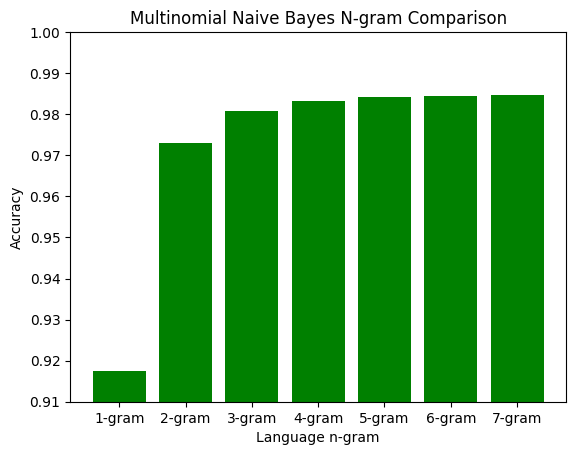

In [31]:
# Create Data
mnb_model_results = [0.9175731658425765, 0.9729787518374984, 0.9807296538821328, 0.9833221969798209, 0.9842041961780035, 0.9844714686623012, 0.9846051049044501]
mnb_model_labels = ['1-gram', '2-gram', '3-gram', '4-gram', '5-gram', '6-gram', '7-gram']
fig, ax = plt.subplots()
  
# plot data in grouped manner of bar type
b1 = ax.bar(mnb_model_labels, mnb_model_results, color='green')
ax.bar_label(b1, mnb_model_results, label_type='center')

# Edit graph with scales and labels
plt.ylim(0.91, 1.0)
plt.xlabel("Language n-gram")
plt.ylabel("Accuracy")
plt.title("Multinomial Naive Bayes N-gram Comparison")
plt.show()

Below we are showing the accuracy score of the differnt n-gram models for the two different support vector machine kernels that were implemented, RBF and Polynomial.

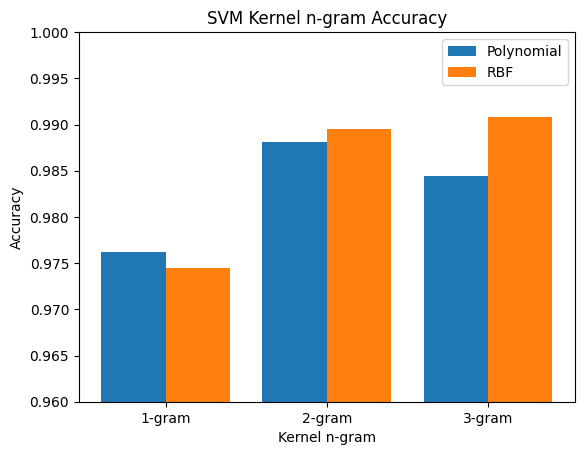

In [37]:
# create data
poly_accuracy = [0.9762394761459308, 0.98815982894561, 0.9844447414138714]
rbf_accuracy = [0.9744487505011359, 0.9895229186155285, 0.9908592810370173]
kernel_model_labels = ['1-gram', '2-gram', '3-gram']
x = np.arange(3)
width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, poly_accuracy, width, label='Polynomial')
plt.bar(x+0.2, rbf_accuracy, width, label='RBF')
  
# Edit graph with scales and labels
plt.ylim(0.96, 1.0)
plt.xlabel("Kernel n-gram")
plt.xticks(x, kernel_model_labels)
plt.ylabel("Accuracy")
plt.title("SVM Kernel n-gram Accuracy")
plt.legend()
plt.show()

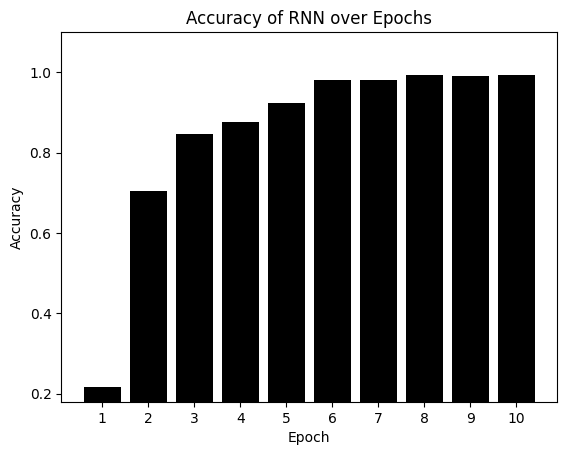

In [60]:
# Create Data
rnn_epoch_accruacy = [0.2163, 0.7055, 0.8474, 0.8774, 0.9243, 0.9804, 0.9796, 0.9928, 0.9904, 0.9939]
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  
# plot data in grouped manner of bar type
plt.bar(epochs, rnn_epoch_accruacy, color='black')

# Edit graph with scales and labels
plt.ylim(0.18, 1.1)
plt.xlabel("Epoch")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.title("Accuracy of RNN over Epochs")
plt.show()


Below we are showing the f1-score of all three models in a cluster bar graph to allow for easier comparison of the models and their performance. 

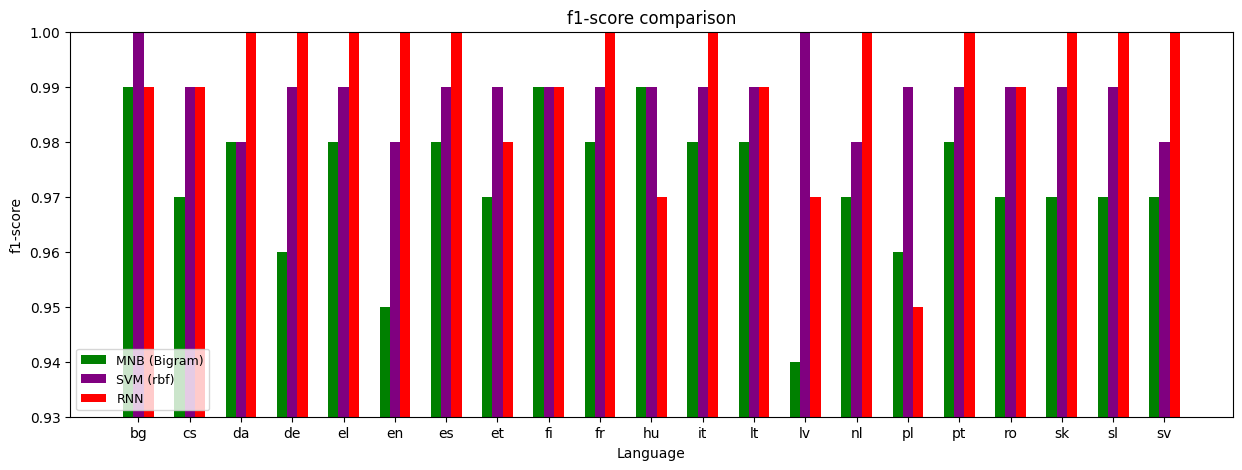

In [30]:
# create data
rnn_f1 = [.99, .99, 1.0, 1.0, 1.0, 1.0, 1.0, .98, .99, 1.0,.97,1.0,.99,.97,1.0,.95,1.0,.99,1.0,1.0,1.0]
mnb_f1 = [.99,.97,.98,.96,.98,.95,.98,.97,.99,.98,.99,.98,.98,.94,.97,.96,.98,.97,.97,.97,.97]
svm_f1 = [1.0,.99,.98,.99,.99,.98,.99,.99,.99,.99,.99,.99,.99,1.0,.98,.99,.99,.99,.99,.99,.98]
label = ['bg','cs','da','de','el','en','es','et','fi','fr','hu','it','lt','lv','nl','pl','pt','ro','sk','sl','sv']
plt.figure(figsize=(15, 5))
x = np.arange(21)
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, mnb_f1, width, color='green', label='MNB (Bigram)')
plt.bar(x, svm_f1, width, color='purple', label='SVM (rbf)')
plt.bar(x+0.2, rnn_f1, width, color='red', label='RNN')

# Edit graph with scales and labels
plt.xticks(x, label)
plt.xlabel("Language")
plt.yticks([.93, .94, .95, .96, .97, .98, .99, 1.0])
plt.ylim(0.93, 1.0)
plt.ylabel("f1-score")
plt.legend(loc='lower left', fontsize=9)
plt.title("f1-score comparison")
plt.show()

Below we are showing the average f1-score of all three models by each specific language, allowing us to see how each language did overall. 

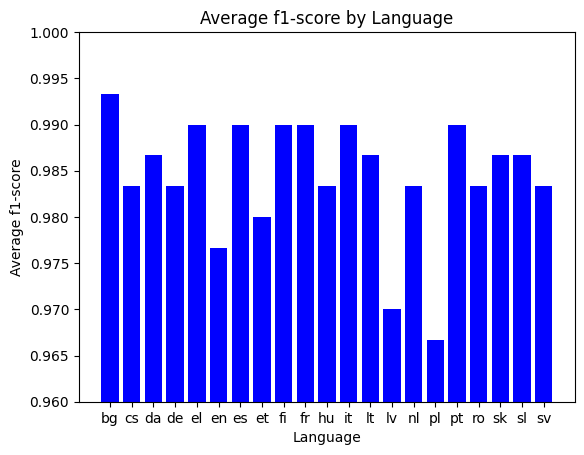

bg with average f1-score of 0.9933333333333333
cs with average f1-score of 0.9833333333333334
da with average f1-score of 0.9866666666666667
de with average f1-score of 0.9833333333333334
el with average f1-score of 0.9899999999999999
en with average f1-score of 0.9766666666666666
es with average f1-score of 0.9899999999999999
et with average f1-score of 0.98
fi with average f1-score of 0.9899999999999999
fr with average f1-score of 0.9899999999999999
hu with average f1-score of 0.9833333333333334
it with average f1-score of 0.9899999999999999
lt with average f1-score of 0.9866666666666667
lv with average f1-score of 0.9700000000000001
nl with average f1-score of 0.9833333333333334
pl with average f1-score of 0.9666666666666667
pt with average f1-score of 0.9899999999999999
ro with average f1-score of 0.9833333333333334
sk with average f1-score of 0.9866666666666667
sl with average f1-score of 0.9866666666666667
sv with average f1-score of 0.9833333333333334


In [46]:
lang_avg = []
for i in range(21):
    lang_avg.append((mnb_f1[i] + svm_f1[i] + rnn_f1[i]) / 3)
  
# plot data in grouped manner of bar type
plt.bar(label, lang_avg, color='blue')

# Edit graph with scales and labels
plt.xlabel("Language")
plt.ylim(0.96, 1.0)
plt.ylabel("Average f1-score")
plt.title("Average f1-score by Language")
plt.show()

for i in range(len(label)):
    print(label[i], 'with average f1-score of', lang_avg[i])

Below we are showing the average f1-score across all languages of each respective model, allowing us to see how each model did overall. 

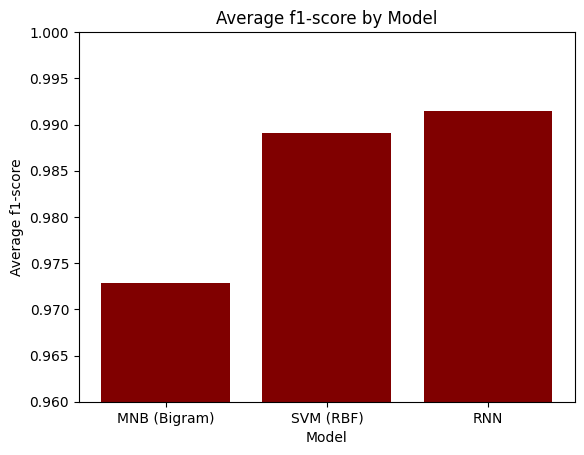

MNB (Bigram) with average f1-score of 0.9728571428571426
SVM (RBF) with average f1-score of 0.9890476190476188
RNN with average f1-score of 0.9914285714285713


In [50]:
mnb_avg = np.average(mnb_f1)
svm_avg = np.average(svm_f1)
rnn_avg = np.average(rnn_f1)

# plot data in grouped manner of bar type
plt.bar(['MNB (Bigram)', 'SVM (RBF)', 'RNN'], [mnb_avg, svm_avg, rnn_avg], color='maroon')

# Edit graph with scales and labels
plt.xlabel("Model")
plt.ylim(0.96, 1.0)
plt.ylabel("Average f1-score")
plt.title("Average f1-score by Model")
plt.show()

print('MNB (Bigram) with average f1-score of', mnb_avg)
print('SVM (RBF) with average f1-score of', svm_avg)
print('RNN with average f1-score of', rnn_avg)